<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/Project_used_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘**중고차 데이터 분석 및 시각화**🚘

>**1.연구 배경**
  
국내 중고차 시장 규모는 20조 ~ 25조원으로 추정됩니다.</br>
**한국자동차산업협회(KAMA)**가 발표한 **'2020년 국내 중고차 거래현황 분석 및 시사점' 보고서**에 따르면
  **2020년 한 해 동안 국내에서 거래된 중고차 대수**는 **약 251만 5000대**로, <u>**같은 기간 신차 판매량보다 
  약 1.32배 이상 높은 수치**</u>를 기록하였습니다. </br>
  
KAMA에서 발표한 보고서에 따르면 국내 중고차 시장에서 매매업자를 통한 거래보다 개인등 당사자 간의
  거래의 비중이 더 높은 것으로 나타나 **<u>중고차 매매업자에 대한 소비자 불신이 심각한 수준</u>**이라는 분석이 나왔습니다.
  
  - 당사자간의 거래 : 54.7%
  - 중고차 매매업자를 통한 거래 : 45.3% 
  
  
또한 지난 3월, 중소벤처기업부에 따르면 생계형 적합업종 심의위원회는 중고차 판매업을 생계형 적합업종으로 지정하지 않기로 의결하며 **완성차 대기업의 중고차 시장 진출이 가능**해졌습니다. </br>
  
   이는 완성차 대기업의 진출로 중고차 성능 및 상태 등등의 제품의 신뢰성이 확보되고, </br>소비자들에게 제품 구매에 관한 신뢰도를 높임으로써 **중고차 거래에서 더 나은 활력**을 불어줄 것입니다. </br>

**하지만** 큰 규모의 중고차 시장을 들여다보면</br> 
**중고차 중개인의 허위 매물 판매, 중고차의 성능 및 상태 조작 등등의  여러가지 사건 & 사고가 존재**합니다.

**이번 프로젝트를 통해 구매하고 싶은 차의 종류 및 상태의 적정 가격을 알 수 있다면,**</br> 
<u>**매매업자 및 당사자간의 거래에서 원활한 거래를 진행할 수 있을 것 입니다.**</u>


 * 연구 배경 참조 URL
  - [URL 1](https://www.yna.co.kr/view/AKR20211025079400003)
  - [URL 2]((https://biz.chosun.com/industry/company/2022/03/17/7K2CGANW3BB7RFI5CWXIKWFUYA/))



>**2.연구 목적**

* 구매하고 싶은 차의 종류 및 적정 가격을 알 수 있다.
* 위 내용을 바탕으로 앞으로의 중고차의 거래에서 원활한 거래를 진행할 수 있다.



>**3.연구 방법**

* 자료 : [Kaggle 데이터 참조](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)

* 사용할 수 있는 방법 
 - 머신러닝 지도학습 : 회귀 & 결정트리
 - 데이터를 살펴보고 어떤 방법을 사용할 지 결정합니다.
 - 지도학습 회귀 & 결정트리는 알아보고자하는 target 이 어떠한 데이터 형태를 띄느냐에 따라 사용할 수 있는 방법이 다릅니다.
  
  - ex) 회귀 output : 연속형 변수</br>분류 output : 범주형 변수
  - 데이터를 살펴보고, 전처리 및 가공을 통해 올바른 방법으로 데이터를 분석을 진행하고자 합니다. 





❗  참고
* 필요한 라이브러리 및 패키지는 그때마다 가져와서 사용하도록 하겠습니다.


In [1]:
# 데이터 불러오기 (크롬)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

# 전처리 작업 진행 도중 값의 앞 부분에 띄어쓰기가 들어가 있어 삭제합니다. 
# 파라미터: skipinitialspace=True 

# 아우디 
audi = pd.read_csv('/content/drive/MyDrive/project : used_car/audi.csv',skipinitialspace=True)


# 1. Audi 데이터 살펴보기.
> 외제차중 인기있는 브랜드 중 하나인 audi의 DATA를 살펴봅니다.



In [3]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


* 각각의 컬럼은 다음과 같습니다. 
  - model : 자동차의 모델명🏎
  - year : 연식 📅
  - price : 가격 💸
  - transmission : 변속기⚙
  - mileage : 자동차 주행거리🎛
  - fuelType : 자동차 연료의 유형⛽
  - tax : 세금(자동차)🧾
  - mpg(Miles per Gallon) : 연비(Fuel efficiency)🎭
  - engineSize :엔진 크기🦾

#### **1-2. EDA : Audi** 

In [4]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
# 숫자 타입 데이터 살펴보기.
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [7]:
# 문자열 데이터 타입 살펴보기.
audi.describe(exclude = np.number)

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


데이터의 결측치는 없는 상태입니다.
추가적으로 놓친 부분이 없는지 ```ProfileReport```를 이용하여 데이터를 확인합니다.


In [8]:
# 필요한 라이브러리 가져오기.
!pip install category_encoders
!pip install pandas-profiling==2.11.0 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 755 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 243 kB 4.8 MB/s 
     |████████████████████████████████| 4.7 MB 56.3 MB/s 
     |████████████████████████████████| 62 kB 2.0 MB/s 
     |████████████████████████████████| 679 kB 62.5 MB/s 
     |████████████████████████████████| 75 kB 5.4 MB/s 
     |████████████████████████████████| 296 kB 78.6 MB/s 
     |████████████████████████████████| 1.6 MB 69.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=925c6566cab404435da62f1f581e4b7ffe17fb655f4319ff1417298783f63d44
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: requests
    Found existing instal

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(audi, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

현재 데이터에서 중복되는 행이 존재하며, ```col : tax```에서는 zero 값이 존재하는 것을 알 수 있었습니다.

* 먼저 중복되는 값들을 확인해봅니다.

In [10]:
audi.duplicated().value_counts()

False    10565
True       103
dtype: int64

In [11]:
# 중복된 행을 찾기 위한 함수 생성.

True_list = []

def check_duplicate(data):

  # 중복값 확인
  bool_index = audi.duplicated()
  
  for index,values in enumerate(bool_index):
    if values == True :
      True_list.append(index)
  
  return None    

In [12]:
# 정의한 함수 실행 : check_duplicate
check_duplicate(audi)

In [13]:
len(True_list)

103

중복되는 값들은 ```ProfileReport```에서 보고된 개수와 일치합니다.
* 데이터의 개수가 그리 많지 않으니 중복된 데이터의 행을 살펴봅니다.

In [14]:
audi_dup_data = audi.loc[True_list]
audi_dup_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
273,Q3,2019,34485,Automatic,10,Diesel,145,47.1,2.0
764,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
784,Q3,2015,13995,Manual,35446,Diesel,145,54.3,2.0
967,Q5,2019,31998,Semi-Auto,100,Petrol,145,33.2,2.0
990,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
...,...,...,...,...,...,...,...,...,...
9508,A4,2019,26990,Automatic,2250,Diesel,145,50.4,2.0
9521,Q3,2019,26990,Manual,10,Petrol,145,40.9,1.5
9529,Q5,2019,44990,Automatic,10,Diesel,145,36.2,2.0
9550,Q3,2019,29995,Manual,10,Petrol,145,39.8,1.5


중복된 값들만 포함된 df만 살펴보니 삭제하는게 큰 의미가 있을 것 같지 않습니다.

In [15]:
audi_dup_data.tax.value_counts()

145    90
20      4
150     3
125     2
0       2
200     1
30      1
Name: tax, dtype: int64

In [16]:
audi[audi['engineSize'] ==0].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0


엔진의 값에서 '0'인 값들이 존재합니다.
```engineSize : 0```이라면 엔진이 없다고 느낄 수 있으므로 잘못된 관측치인 것 같습니다.

* 다행스럽게도 자동차 모델의 세세한 옵션을 제외하곤 모두 규격화되어 있으므로
  같은 종류의 자동차의 엔진크기를 입혀도 될 것 같습니다.

* 먼저 자동차모델 및 연료타입에 따른 엔진사이즈만 따로 확인해보도록 합니다.

In [17]:
# 자동차 모델 및 연료타입 및 연료사이즈
extraction_audi = audi.loc[:,['model','fuelType','engineSize']]
extraction_audi.head()

,model,fuelType,engineSize
0,A1,Petrol,1.4
1,A6,Diesel,2.0
2,A1,Petrol,1.4
3,A4,Diesel,2.0
4,A3,Petrol,1.0


In [18]:
groupby_audi = extraction_audi.set_index(["model", "fuelType"])[["engineSize"]]
groupby_audi

engineSize
model fuelType            
A1    Petrol           1.4
A6    Diesel           2.0
A1    Petrol           1.4
A4    Diesel           2.0
A3    Petrol           1.0
...                    ...
      Petrol           1.0
      Petrol           1.0
      Petrol           1.0
Q3    Petrol           1.4
      Petrol           1.4

[10668 rows x 1 columns]

In [19]:
# A3에 대해서만 확인합니다.
A3_engineSize = groupby_audi.loc[['A3',],:]
A3_engineSize.head()

engineSize
model fuelType            
A3    Petrol           1.0
      Petrol           1.4
      Petrol           1.4
      Petrol           1.4
      Petrol           1.4

연료타입이 같음에도 불구하고 엔진사이즈가 다른 경우가 존재합니다. </br>
혹시 연료타입이 아닌 다른 결과가 엔진사이즈에 영향을 미칠 수 도 있을 것 같습니다. <br/>

```transmission```과 함께 확인하여 봅니다.


In [20]:
groupby_audi = audi.set_index(["model", "year", "transmission", "fuelType"])[["engineSize"]].sort_values(by='year')

In [21]:
## row 생략 없이 출력
#pd.set_option('display.max_rows', None)

## col 생략 없이 출력
#pd.set_option('display.max_columns', None)

groupby_audi = groupby_audi.loc[['A3',],:]
groupby_audi

engineSize
model year transmission fuelType            
A3    1998 Automatic    Petrol           1.8
      2003 Automatic    Diesel           1.9
      2004 Automatic    Petrol           1.6
      2005 Manual       Petrol           2.0
                        Petrol           1.6
...                                      ...
      2020 Semi-Auto    Hybrid           1.4
           Manual       Diesel           1.6
                        Diesel           2.0
                        Petrol           1.5
                        Diesel           1.6

[1929 rows x 1 columns]

#### 별다른 특이점을 찾지 못하였습니다❗
* 같은 연도에서 ```fuelType```, ```transmission```을 살펴보았으나, 세 가지 모두 같음에도 엔진의 값이 다른 경우가 존재합니다. 

  - 즉 이들 값으로 엔진의 값을 채우는 것은 무리가 있어보이므로, ```engineSize```가 '0' 으로 되어있는 값은 삭제하도록 하겠습니다. 

####1-2-1.```engineSize```가 0인 행을 삭제하도록 합니다.

In [22]:
# engineSize = 0인 행만 따로 추출
engineSize_0 = audi[audi['engineSize'] == 0]

print(f'엔진 사이즈가 0인 경우 :{engineSize_0.shape}')

# 제거하기 전 audi : df크기
print(f'제거하기 전 df 크기 : {audi.shape}')

# table drop
# 엔진 사이즈가 0인 값들은 모두 제거합니다.
audi = audi[audi['engineSize'] !=0]


# 제거 이후 audi : df크기
print(f'제거이후 df 크기 : {audi.shape}')

엔진 사이즈가 0인 경우 :(57, 9)
제거하기 전 df 크기 : (10668, 9)
제거이후 df 크기 : (10611, 9)


#### 1-2-2. year 제거.
>현재 날짜를 기준으로 보았을 때, 90년대 및 2000년대 중고차 차량은 매력이 없는 상품일 것 입니다.

* 차의 연식이 오래될수록, 비교적 차량의 관리가 어렵고, 사고 또한 존재할 위험이 있으며, 주행거리 또한 높을 확률이 통념상 높습니다.

* 차량의 기준점은 2014년으로 잡도록 하겠습니다. 
  - 2014년 이전의 생산차량은 모두 제거하도록 합니다.
  


In [23]:
# 날짜 컬럼만 살펴봅시다.
audi['year'].sort_values() # 1998년도 차량이 존재합니다.
identify_year = audi[audi['year'] < 2014]

# 2014년 미만의 데이터 확인
print(f'2014년 미만의 차량의 개수는 총 {identify_year.shape[0]}대 입니다.')
print(f'제거 전의 데이터 크기는 총 {audi.shape[0]}입니다.')
audi = audi[audi['year'] > 2013]
print(f'제거 후의 데이터 크기는 총 {audi.shape[0]}입니다.')

2014년 미만의 차량의 개수는 총 545대 입니다.
제거 전의 데이터 크기는 총 10611입니다.
제거 후의 데이터 크기는 총 10066입니다.


####1-2-3. EDA : IQR Method 💡
> 데이터 내에서 이상치를 탐지하는 강력한 방법중 하나로
  데이터를 정제하기 위해 IQR Method로 데이터를 탐색합니다.

* 이상치 : 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값 & 큰 값
* 시각화 : 이상치를 눈에 볼 수 있게끔 시각화 또한 포함합니다.

 **❗주의 :  <u>몇가지 컬럼에 대하여는 IQR Method를 실행하지 않겠습니다</u>❗**
* ```차량 연비 : mpg``` 같은 경우, 비싼 스포츠카 및 고급 외제차는 많은 연비가 나올 수 있습니다.
* ``` 가격 : price ``` 와 같은 경우, 비싼 스포츠카 및 고급 외제차는 '감가' 또한 적게 이루어질 수 있습니다.  

#### ```mileage```에 대하여 이상치 컬럼을 확인합니다. 
중고차를 구매할 때 많은 주행거리는 상대적으로 매력이 있지 않습니다. </br>
따라서 이상치로 판단하여, 너무 많은 주행거리는 삭제하겠습니다.

In [24]:
# 이상치를 탐지 하기 위해 함수를 정의합니다. : IQR Method 

#  필요한 라이브러리를 가져옵니다.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def outlier_iqr(data, column):
  
  
  boxplot_column = sns.boxplot(x = column, data =data)
  plt.title(f'Outlier Data : {column}')
  plt.show()
  
  # 글로벌 변수 선언
  global lower, upper, data1, data2, data_cleaning

  # 분위수 기준 정하기.
  q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

  # iqr 계산.
  iqr = q3 - q1

  # 이상치 : outlier cutoff 계산
  cut_off = iqr*1.5

  # lower, upper bound 값 구하기.
  lower, upper = q1 - cut_off, q3 + cut_off

  # identify...
  print(f'IQR은 {iqr} 이다.')
  print(f'lower bound 값은 {lower} 이다.')
  print(f'upper bound 값은 {upper} 이다.')

  # 1사분위 및 4사분위에 속해있는 데이터 저장. 
  data1 = data[data[column] > upper]
  data2 = data[data[column] < lower]

  # 이상치 개수 구하기.
  print(f'총 이상치 개수는 {data1.shape[0] + data2.shape[0]}이다.')

  # 제거전 데이터의 크기.
  print(f'제거 전 데이터 크기 {data.shape}')
  # 이상치 제거
  data_cleaning = data[(data[column]<upper) & (data[column] > lower)]
  
  print(f'제거 이후 데이터 크기{data_cleaning.shape}')

  return data_cleaning

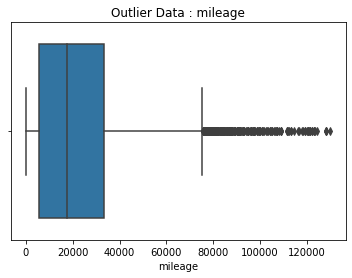

IQR은 27947.25 이다.
lower bound 값은 -36361.125 이다.
upper bound 값은 75427.875 이다.
총 이상치 개수는 259이다.
제거 전 데이터 크기 (10066, 9)
제거 이후 데이터 크기(9807, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [25]:
outlier_iqr(audi, 'mileage')

In [26]:
audi = data_cleaning
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [27]:
# 시각화 라이브러리 한글 깨짐 현상 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,908 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [28]:
# 정제된 데이터를  outlier_iqr이 적용된 데이터에 덮어씌웁니다.
audi = data_cleaning
audi.shape

(9807, 9)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

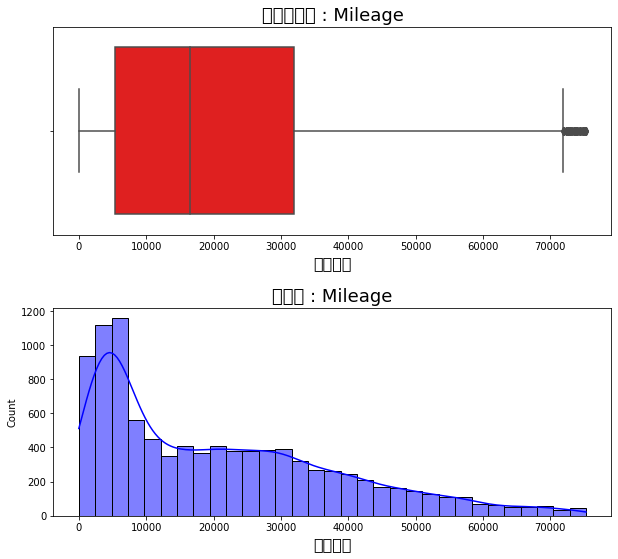

In [29]:
# 런타임 재시작 및 실행 이후 이 코드셀을 다시 한 번 실행하면 한글 출력 원활하게 나옴.

# 박스플롯으로 다시 한 번 확인하여 봅시다.
fig, axes = plt.subplots(2,1, figsize = (10,9))
sns.boxplot(data= audi, x = 'mileage', color = 'red', ax = axes[0])
sns.histplot(data = audi, x = 'mileage', kde = True, color = 'blue', ax=axes[1])

# subplots 간격조절.
plt.subplots_adjust(hspace = 0.35)


# 한글깨짐 방지 폰트 지정 matplotlib.
plt.rc('font', family='NanumBarunGothic') 
plt.title('Audi 차량의 마일리지')

# 제목 생성
axes[0].set_title("박스그래프 : Mileage", fontsize = 18)
axes[1].set_title("분포도 : Mileage", fontsize = 18) 

axes[0].set_xlabel('주행거리', fontsize=16)
axes[1].set_xlabel('주행거리', fontsize=16)
plt.show()

In [30]:
audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

###1-2-4. 이번에는 연비를 살펴봅시다.
* 살펴본 결과, 0의 연비를 가지고 있는 자동차는 현재 데이터에서 존재하지 않습니다.

In [31]:
audi['mpg'].sort_values(ascending = True)

4783      21.1
2255      21.1
10468     21.4
4742      21.4
5459      21.4
         ...  
4261     188.3
4493     188.3
3106     188.3
10392    188.3
4879     188.3
Name: mpg, Length: 9807, dtype: float64

이번에는 tax에 대하여 살펴보도록 합니다.


In [32]:
audi['tax'].sort_values()

7592       0
8795       0
2972       0
9847       0
2993       0
        ... 
9868     570
7689     570
10455    570
4976     570
7475     580
Name: tax, Length: 9807, dtype: int64

* 차량의 종류에 따라 세금은 다를 수 있습니다. 
  - 하지만 세금이 0인 경우는 어째서 0인지 잘 모르겠습니다.</br>
    현재 데이터에서 세금이 0인 경우는 어째서 세금이 0인지 살펴볼 수 없으므로,
    삭제하도록 하겠습니다.

In [33]:
# 현재 세금이 0인 경우에 해당하는 차량은 총 462대 입니다.
# 현재  audi데이터의 shape은 (9807,9) 이므로  세금이 0인 차량을 제외한다면  9,345가 되어야 합니다.
audi[audi['tax'] == 0].shape
audi = audi[audi['tax']>0]
audi.shape

(9345, 9)

#### 현재 ```col : year, engineSize, mileage, mpg, tax```에 까지 데이터를 살펴봤습니다.
나머지 컬럼은 범주형 변수 및 문제점이 없는데이터라고 생각하여 분석을 진행하도록 하겠습니다.

#### 1-3. Features Engineering
> 정제된 데이터에 추가로 알아보고 싶은 것들을 작성합니다. <br>

* 차량의 타입으로 자동차를 고를 분들도 존재할 것 같아, 차량의 타입을 작성했습니다. 
  - ex) sedan, suv, hatchback...

* 이외에 다양한 아이디어로 작성할 수 있습니다.

> 다음과 같은 컬럼을 추가하였습니다.

* ```'size_and_type'``` : size & type을 나타내는 컬럼 생성.</br> 
  <sub>이후 ```size```와 ```type```을 나눠 추가 생성하였습니다.</sub>

* ```used_year``` : 차를 사용한 연도를 알아보기 쉽게 하기 위해 표기하였습니다.</br>
<sub> 기준은 2022년이며, 단위는 (년) 입니다.</sub>

* ```ampy``` : 연간 평균 주행거리를 의미합니다. 
</br><sub>Average_mileage_per_year </sub>

* ```km/l``` : 자동차 연비를 한국식으로 표현했습니다.
<sub> ```mpg```보다는 가독성이 더 좋을 것 같습니다...</sub>

In [34]:
def engineering_audi(data):

  # 적용되어야 할 df의 모든 속성 가져오기.
  selected_cols = data.select_dtypes(include = ['number','object'])

  # size & type을 나타내는 컬럼 생성.
  data['size_and_type'] = data['model']

  # 생성된 컬럼의 값을 대체합니다.
  data.replace({'size_and_type' : {'A1':'small_hatchback',
                                   'A2':'small_hatchback',
                                   'A3':'submid_hatchback',
                                   'A4':'mid_sedan',
                                   'A5':'mid_coupe',
                                   'A6':'subfull_sedan',
                                   'A7':'subfull_coupe', 
                                   'A8':'full_sedan',
                                    
                                   'Q2':'small_suv',
                                   'Q3':'submid_suv',
                                   'Q5':'mid_suv',
                                   'Q7':'subfull_suv',
                                   'Q8':'subfull_suv',
                                    
                                   'S3':'submid_hatchback',
                                   'S4':'mid_sedan',
                                   'S5':'mid_coupe',
                                   'S8':'full_sedan',
                                    
                                   'SQ5':'mid_suv',
                                   'SQ7':'subfull_suv',
                                    
                                   'RS3':'submid_hatchback',
                                   'RS4':'mid_sedan',
                                   'RS5':'mid_coupe',
                                   'RS6':'subfull_wagon',

                                   'TT':'small_sportscoupe',
                                   'R8': 'mid_sportscoupe'}}, inplace = True)
  

  # size & type 생성.
  data['size'] = data['size_and_type'].str.split('_').str[0]
  
  data['type'] = data['size_and_type'].str.split('_').str[1]
  
  # 사용한 날짜(단위 : 년) 생성 / 기준년도 2022년
  data['used_year'] = (2022 - data['year']) + 1
 
  # 연간 평균 주행거리 :Average_mileage_per_year
  data['ampy'] = (data['mileage'] / data['used_year']).round(1)
  
  # 자동차 연비 : mpg라서 한국식으로 좀 바꿔봅시다.
  # 1mpg : 0.43km/L 을 기준으로 잡아서 계산하였습니다. 
  data['km/l'] = (data['mpg'] * 0.43).round(1)


  return audi

In [35]:
engineering_audi(audi).head()

<ipython-input-34-40085a3e5ba7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size_and_type'] = data['model']
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-34-40085a3e5ba7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,size_and_type,size,type,used_year,ampy,km/l
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,small_hatchback,small,hatchback,6,2622.5,23.8
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,subfull_sedan,subfull,sedan,7,5171.9,27.6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,small_hatchback,small,hatchback,7,4278.0,23.8
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,mid_sedan,mid,sedan,6,4325.3,28.9
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,submid_hatchback,submid,hatchback,4,499.5,21.3


In [36]:
# 최종적으로 생성된 데이터를 한번 확인하여 봅시다.
audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 10667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          9345 non-null   object 
 1   year           9345 non-null   int64  
 2   price          9345 non-null   int64  
 3   transmission   9345 non-null   object 
 4   mileage        9345 non-null   int64  
 5   fuelType       9345 non-null   object 
 6   tax            9345 non-null   int64  
 7   mpg            9345 non-null   float64
 8   engineSize     9345 non-null   float64
 9   size_and_type  9345 non-null   object 
 10  size           9345 non-null   object 
 11  type           9344 non-null   object 
 12  used_year      9345 non-null   int64  
 13  ampy           9345 non-null   float64
 14  km/l           9345 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


## 2. Data Visualization🙇🏻‍♂️
> 현재 데이터에서 살펴볼 수 있는 것을 살펴보고자 합니다.

In [37]:
# 호버기능을 이용할 수 있는 plotly 사용
!pip install plotly
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 474 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


#### 2-1. 모델별 차량의 개수

In [38]:
# 필요한 라이브러리를 가져옵니다.
import plotly.express as px
import plotly.graph_objs as go

# 모델에 따른 개수를 확인합니다.
audi_counts = audi.groupby('model')['model'].count().reset_index(name ='counts').sort_values(by='counts')

# 시각화에 들어갈 색상 생성
sns.set_palette("Set2")  

# 시각화
fig = px.bar(audi_counts,
             x = 'counts',
             y= 'model',
             text_auto = 'Count',
             color = audi_counts['model'])


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 모델별 차량의 개수</b><br><sup> Count of Model "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>종류별 개수</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


#2. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)


fig.show()


####2-2. 아우디 자동차별 평균 가격에 대한 시각화
> 평균가격에서 소수점 반올림을 진행합니다.

* 차량의 개수가 가장많은 A3는 두번째로 가장 싼 평균가격을 차지하고 있습니다.
* 아우디 :R8의 중고차 매물은 24대뿐이지만, 가장 비싼 평균금액대를 형성하고 있습니다.


In [39]:
#자동차별 평균 금액 묶기.
price_model = audi.groupby('model')['price'].mean().reset_index(name = 'prices').sort_values(by='prices')

# 반올림
price_model['prices'] = price_model['prices'].round()

# 영국의 차량을 나타내는 데이터이므로 '파운드 -> 원' 으로 바꿔줍니다.
price_model['prices'] = price_model['prices'] * 1600


# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")

# 시각화
fig = px.bar(price_model,
             x = 'prices',
             y = 'model',
             text_auto = True,
             color = price_model['model'])



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 모델별 평균 금액</b><br><sup> Average amount of Model "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>평균 금액</b><br><sup>단위:원화</sup>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)

# 2-1. 가장 싼 차량
fig.add_annotation(
    text = '가장 싼 차량 : A1', 
    y = 24,
    showarrow = False,
    xshift = 60
)


# 2-2. 금액 중앙값.
fig.add_annotation(
    text = ' "다양한 모델" 중 중앙 값 : SQ5',
    y = 12,
    showarrow = False,
    xshift = 110
)


# 2-3. 가장 비싼 차량
fig.add_annotation(
    text = '가장 비싼 금액의 차량 :R8',
    y = 0,
    showarrow = False,
    xshift = 100
)


#3. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)

fig.show()

####2-3. 차량 타입에 따른 개수 확인.
> 모델 이름은 모르지만, 자동차의 타입(해치백,suv...)을 알고 있다면 확인할 수 있습니다.

* suv 타입의 자동차가 현재 중고차 시장에 가장 많은 매물을 형성하고 있는 것을 확인할 수 있습니다.

In [40]:
types_counts = audi.groupby('type')['type'].count().reset_index(name = 'counts').sort_values(by='counts')
types_counts



# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")

# 시각화
fig = px.bar(types_counts,
             x = 'counts',
             y = 'type',
             text_auto = True,
             color = types_counts['type'])



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 타입별 개수</b><br><sup> Number by vehicle type "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>총 개수</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>타입 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


#3. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)

fig.show()



####2-4. 차량 모델에 따른 가격의 범위
* R8의 최소가격 및 최대가격이 가장많은 차이를 보여주는 것으로 나타났습니다.
  - RS7 & S5는 차량이 각각 1대뿐입니다.

In [41]:
fig = px.box(audi, 
             x = 'model', 
             # 파운드 -> 원
             y = audi['price'] * 1600,
             color = audi['model'])

# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 모델에 따른 가격의 범위</b><br><sup> Price range according to  "Audi" model </sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>금액</b><br><sup>(단위 : 원)</sup>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


# RS7 가격 표기
fig.add_annotation(
    text = '<b>RS7</b><br><sup> 원화 : 53,584,000</sup>',
    x = 2.45,
    y = 53584000,
    showarrow = True,
    arrowhead = 4,
    ax= -50,
    ay= -30,
    xshift = 1000
)

# S5 가격 표기
fig.add_annotation(
    text = '<b>S5</b><br><sup> 원화 : 30,320,000</sup>',
    x = 2.45,
    y = 30320000,
    showarrow = True,
    arrowhead = 4,
    ax= -20,
    ay= 30,
    xshift = 1050
)


fig.show()

#### 2-5. 특정 엔진 크기를 가진 차량의 가격대.
> 엔진 사이즈가 4.1 및 6.3인 경우 값이 각각 1개씩 존재합니다. (별도 표기)


In [42]:

audi_engine = audi[['engineSize', 'price']].sort_values(by='engineSize')
audi_engine


fig = px.box(audi_engine,
             x = 'engineSize',
             # 파운드 -> 원
             y = audi_engine['price'] * 1600,
             color = audi_engine['engineSize'])


# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 엔진에 따른 가격의 범위</b><br><sup> Range of prices according to "audi" engine </sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>엔진 종류</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>금액</b><br><sup>(단위 : 원)</sup>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)

# 2-3. engineSize = 4.1
fig.add_annotation(
    text = '<b>engineSize = 4.1 </b><br><sup> 원화 : 36,792,000</sup>',
    x = 2.45,
    y = 36792000,
    showarrow = True,
    arrowhead = 4,
    ax= -120,
    ay= -30,
    xshift = 370
)



# 2-4. engineSize = 4.1
fig.add_annotation(
    text = '<b>engineSize = 6.3 </b><br><sup> 원화 : 51,200,000</sup>',
    x = 4.5,
    y =51200000,
    showarrow = True,
    arrowhead = 4,
    ay= -30,
    ax = -80,
    xshift = 400
)




fig.show()

#### 2-6. 자동차 연도별 세금의 변화
* 연도별 출시된 차량에 따라 중고차 세금의 값이 천차만별이다.
* 비교적 최근연도의 속하는 19~20년식 차량의 세금은 약 150€이다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44256 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52264 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50640 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46384 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

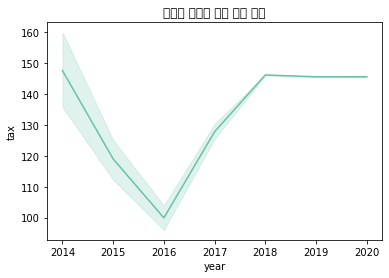

In [43]:
sns.lineplot(x = 'year', y = 'tax', data = audi)
plt.title('중고차 연도에 따른 세금 현황')
plt.show()

####2-7 연도별 가격 변화량
* 비교적 최근에 출시된 차량의 가격이 월등히 높습니다.
* 물가상승 등의 요인도 있겠지만, 개인적으로는 신기술 탑재, 주행거리등 많은 요인이 있을 것으로 생각됩니다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44256 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52264 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

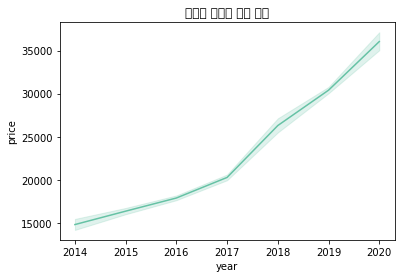

In [44]:
sns.lineplot(x = 'year', y ='price', data = audi)
plt.title ('연도별 중고차 가격 변동')
plt.show()

#### 2-8. 주행거리에 따른 가격을 비교한 산점도 그래프 생성
* 비교적 주행거리 많은 차량일수록 가격이 낮습니다.

In [45]:
fig = px.scatter(audi,
                 x= 'mileage',
                 y = 'price',
                 color = 'model')


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b>주행거리에 따른 가격을 비교한 산점도 </b><br><sup> Price comparison based on mileage</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    )
)
fig.show()

# 3. 👨🏻‍💻 multiple-Linear Regression  (다중선형회귀)


In [46]:
# 필요한 라이브러리 가져오기.
# pipe
from sklearn.pipeline import make_pipeline
# OneHot
from category_encoders import OneHotEncoder
# standardScaler
from sklearn.preprocessing import StandardScaler

# 선형회귀
from sklearn.linear_model import LinearRegression

# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

In [47]:
# 진행 전, 데이터를 분할합니다.
test = audi.sample(frac=0.30, random_state = 40)
train = audi.drop(test.index)

train.shape, test.shape

# 데이터를 훈련/검증 세트로 분리합니다.
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size = 0.70, test_size = 0.30,
                              random_state=40)

train.shape, val.shape, test.shape

# 훈련 / 검증 / 테스트 데이터를 특성과 타겟으로 분리합니다.
target = 'price'
features = train.drop(columns =[target]).columns

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

#### 범주형 변수가 존재하므로 컴퓨터가 인식할 수 있게 인코딩 진행
> 여기서는 원핫인코딩을 사용하겠습니다.

In [48]:
# 인코더
encoder = OneHotEncoder(use_cat_names = True)

# 데이터에 인코딩 적용 

# 훈련 데이터
X_train_encoded = encoder.fit_transform(X_train)

# 검증 데이터
X_val_encoded = encoder.transform(X_val)

#훈련 데이터 확인하기. 
X_train_encoded.head(2)

,model_Q5,model_Q8,model_A3,model_Q3,model_A5,model_A6,model_Q2,model_Q7,model_A1,model_A7,...,type_suv,type_hatchback,type_coupe,type_sedan,type_wagon,type_sportscoupe,type_nan,used_year,ampy,km/l
1954,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,8,3727.5,18.4
5039,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4,1402.0,14.4


####3-1. Feature selection : 특성선택.
> 사이킷런의 SelectKBest를 사용하여 회귀모델에 중요한 특성을 선택하기.

* **```SelectKBest```**를 이용, 가장 효과적인 특성 K개 고르기.

In [49]:
# selector 정의 
# SelectKBest에서 score_func의 파라미터 값은 회귀일 때 -> f_regression, 분류에서는 -> f_classif를 사용한다.
selector = SelectKBest(score_func = f_regression, k=10)

# 학습데이터 : fit_transform
X_train_selected = selector.fit_transform(X_train_encoded, y_train)

# 검증데이터에 transform.
X_val_selected = selector.transform(X_val_encoded)

# shape 확인하기.
X_train_selected.shape, X_val_selected.shape

((4578, 10), (1963, 10))

####선택된 특성 확인하기.

In [50]:
#모든 특성
all_names = X_train_encoded.columns

# .get_support()
selected_mask = selector.get_support()

# 선택된 특성 확인하기.
selected_names = all_names[selected_mask]

# 선택되지 않은 특성들
unselected_names = all_names[~selected_mask]

print('선택된 특성 :', selected_names)
print('선택되지 않은 특성:', unselected_names)

선택된 특성 : Index(['year', 'transmission_Manual', 'mileage', 'mpg', 'engineSize',
       'size_and_type_subfull_suv', 'type_hatchback', 'used_year', 'ampy',
       'km/l'],
      dtype='object')
선택되지 않은 특성: Index(['model_Q5', 'model_Q8', 'model_A3', 'model_Q3', 'model_A5', 'model_A6',
       'model_Q2', 'model_Q7', 'model_A1', 'model_A7', 'model_A4', 'model_RS6',
       'model_S5', 'model_RS4', 'model_TT', 'model_S3', 'model_A8', 'model_R8',
       'model_RS3', 'model_SQ7', 'model_S4', 'model_RS5', 'model_S8',
       'model_SQ5', 'model_RS7', 'transmission_Semi-Auto',
       'transmission_Automatic', 'fuelType_Diesel', 'fuelType_Petrol',
       'fuelType_Hybrid', 'tax', 'size_and_type_mid_suv',
       'size_and_type_submid_hatchback', 'size_and_type_submid_suv',
       'size_and_type_mid_coupe', 'size_and_type_subfull_sedan',
       'size_and_type_small_suv', 'size_and_type_small_hatchback',
       'size_and_type_subfull_coupe', 'size_and_type_mid_sedan',
       'size_and_type_subfull_wag

#### 특성의 수 K를 증가시키면서 가장 좋은 성능을 보일 때 K개를 뽑아봅시다.

In [51]:
# 필요한 라이브러리 가져오기.
from sklearn.metrics import mean_absolute_error, r2_score

# 빈 라이브러리 생성
training = []
valing = []
ks = range(1, len(X_train_encoded.columns)+1)

# 1부터 특성 수만큼 사용한 모델을 만들어서 MAE 값을 비교하기.
for k in range(1, len(X_train_encoded.columns)+1):
  print(f'{k} features')

  # selector 객체 인스턴스 생성
  selector = SelectKBest(score_func = f_regression, k=k)
  
  # 훈련 데이터 적용
  X_train_selected = selector.fit_transform(X_train_encoded, y_train)

  # 검증 데이터 적용
  X_val_selected = selector.transform(X_val_encoded)

  # 현재 데이터의 모든 컬럼.
  all_names = X_train_encoded.columns
  
  # boolean 값으로 선택된 컬럼 확인 : True 값.
  selected_mask = selector.get_support()

  # 선택된 이름
  selected_names = all_names[selected_mask]
  print('선택된 컬럼:', selected_names)

  # Model : 다중선형회귀적용
  model = LinearRegression()
  model.fit(X_train_selected, y_train)
  
  # 예측값.
  y_pred = model.predict(X_train_selected)
  
  # MAE값. (예측값과 실제값의 잔차값에 절대값을 씌움)
  mae = mean_absolute_error(y_train, y_pred)
  
  # 빈 리스트에 mae 값 채우기.
  training.append(mae)

  # 검증데이터를 사용한 예측값.
  y_pred = model.predict(X_val_selected)

  # 검증데이터값과 검증데이터를 이용한 예측값에 대한 MAE
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  valing.append(mae)

  print(f'검증데이터의 MAE 값:, {mae:,.0f}')
  print(f'Test R2:{r2} \n')

1 features
선택된 컬럼: Index(['engineSize'], dtype='object')
검증데이터의 MAE 값:, 6,513
Test R2:0.4683547645319589 

2 features
선택된 컬럼: Index(['mpg', 'engineSize'], dtype='object')
검증데이터의 MAE 값:, 4,708
Test R2:0.6281752983317742 

3 features
선택된 컬럼: Index(['mpg', 'engineSize', 'km/l'], dtype='object')
검증데이터의 MAE 값:, 4,708
Test R2:0.6282115142080298 

4 features
선택된 컬럼: Index(['mpg', 'engineSize', 'used_year', 'km/l'], dtype='object')
검증데이터의 MAE 값:, 3,537
Test R2:0.7731514121358996 

5 features
선택된 컬럼: Index(['year', 'mpg', 'engineSize', 'used_year', 'km/l'], dtype='object')
검증데이터의 MAE 값:, 3,536
Test R2:0.7731969437922146 

6 features
선택된 컬럼: Index(['year', 'mileage', 'mpg', 'engineSize', 'used_year', 'km/l'], dtype='object')
검증데이터의 MAE 값:, 3,421
Test R2:0.7846253490228656 

7 features
선택된 컬럼: Index(['year', 'mileage', 'mpg', 'engineSize', 'size_and_type_subfull_suv',
       'used_year', 'km/l'],
      dtype='object')
검증데이터의 MAE 값:, 3,293
Test R2:0.7875191289964135 

8 features
선택된 컬럼: Index(['ye

#### 효과적인 특성 K개를 뽑기 위한 ```validation Curve``` 그리기
> plotly 를 이용하여 그림을 생성합니다.

* plotly는  x, y 값에 tuple, list, np.array, pandas series를 사용해야만 합니다.
  - 따라서 컬럼의 개수를 나타내는 ```ks```값을 리스트형태로 다시 바꿔줍시다.

In [52]:
# ks = range(1, len(X_train_encoded.columns)+1)
# plotly에 집어넣기 위해 다시 생성합니다.
count_cols = [k for k in range(1,69)]

In [53]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x = count_cols,
                         y= training, 
                         mode = 'lines',
                         name = 'Training Score'))


fig.add_trace(go.Scatter(x = count_cols,
                         y= valing,
                         mode = 'lines',
                         name = 'Val Score'))

# 레이아웃 속성 추가.
fig.update_layout(title = '곡선 : Validation Curve',
                  xaxis_title = 'Feautures counts',
                  yaxis_title = 'MAE')

fig.show()

그래프를 살펴보고, 위의 ```for문```을 살펴봤을 때, 피처의 개수는 10개면 될 것 같습니다.

#### 3-2. 여러 특성을 사용하여 릿지회귀 생성하기.

릿지회귀 : alpha 값 =0.001
Test MAE:$2,549
Test R2:0.900


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



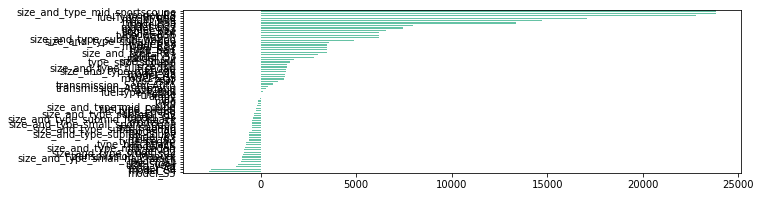

릿지회귀 : alpha 값 =0.01
Test MAE:$2,539
Test R2:0.900


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



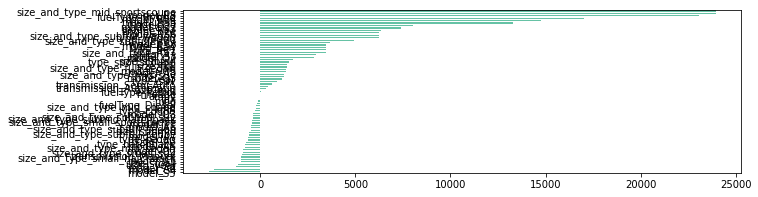

릿지회귀 : alpha 값 =0.02
Test MAE:$2,531
Test R2:0.900


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



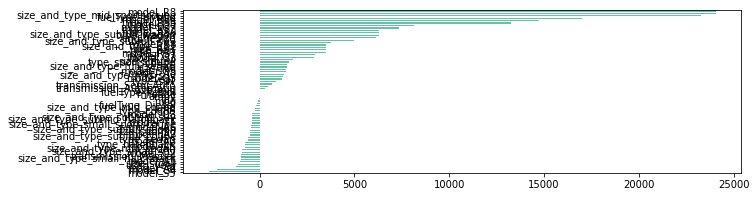

릿지회귀 : alpha 값 =0.1
Test MAE:$2,503
Test R2:0.896


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



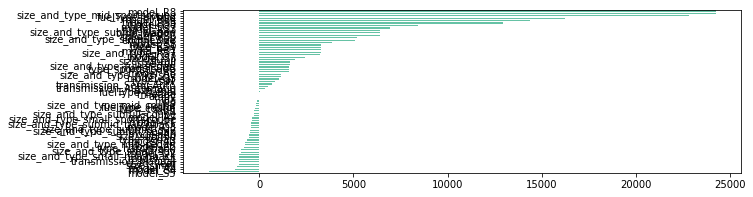

릿지회귀 : alpha 값 =1
Test MAE:$2,834
Test R2:0.832


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



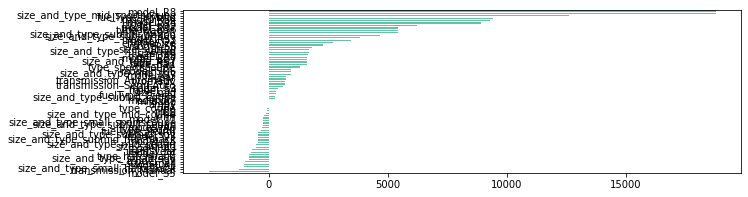

In [54]:
# 릿지회귀  라이브러리 가져오기.
from sklearn.linear_model import Ridge


for alpha in [0.001, 0.01, 0.02, 0.1, 1]:
  print(f'릿지회귀 : alpha 값 ={alpha}')

  # Ridge 모델 학습
  model = Ridge(alpha=alpha, normalize=True)
  model.fit(X_train_encoded, y_train)
  y_pred = model.predict(X_val_encoded)
  
  # MAE for Test
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)

  print(f'Test MAE:${mae:,.0f}')
  print(f'Test R2:{r2:,.3f}')

  coefficients = pd.Series(model.coef_, X_train_encoded.columns)
  plt.figure(figsize=(10,3))
  coefficients.sort_values().plot.barh()
  plt.show()

#### 3-3. 다항함수에 Ridge 회귀 적용
> 다수의 특성을 사용하는 다항함수에 Ridge 회귀를 사용한다면 정규화효과를 더 잘 확인할 수 있다.

In [55]:
# 다항식을 만들기 위해 라이브러리 생성
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       Ridge(**kwargs))


for alpha in [0.001, 0.01, 1.0]:

  print(f'Ridge Regression, alpha={alpha}')
  # Ridge 모델 학습
  model = RidgeRegression(alpha=alpha, normalize=True)
  model.fit(X_train_selected, y_train)
  y_pred = model.predict(X_val_selected)

  # MAE for Test
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  print(f'Test MAE:{mae:,.0f}')
  print(f'R2 Score:{r2:,.4f}\n')

coefs = model.named_steps['ridge'].coef_
print(f'Number of Features:{len(coefs)}')

Ridge Regression, alpha=0.001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



Test MAE:1,843
R2 Score:0.9357

Ridge Regression, alpha=0.01


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



Test MAE:1,822
R2 Score:0.9515

Ridge Regression, alpha=1.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



Test MAE:2,046
R2 Score:0.9330

Number of Features:54740


#### 4. 최종모델 만들기.
> RidgeCV를 사용하여 최적의 alpha 값을 찾아내어 모델 학습 완료하기.


In [56]:
# 필요한 라이브러리 가져오기.
from sklearn.linear_model import RidgeCV

def RidgeCVRegression(degree=3, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       RidgeCV(**kwargs))


# np.arange : 특정 수열 만들기.
alphas = np.arange(0.01, 0.2, 0.03)

# 릿지 회귀
model = RidgeCVRegression(alphas=alphas, normalize = True, cv=2)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_val_selected)

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')


print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import mak

Test MAE: $1,903
R2 Score: 0.9457

Number of Features: 54740
alpha: 0.19
cv best score: 0.806550468747842


#### 최종모델 
> 현재 가지고 있는 데이터를 모두 사용하여 최적의 모델 생성하기.

* 지금 가지고 있는 테스트 데이터를 검증 데이터로 사용하려면 RidgeCV에 훈련데이터로 함께 넣어주어야 합니다.
  - RidgeCV내에서 훈련 데이터를 훈련/검증 데이터로 나누어 최고의 스코어를 갖는 alpha 값을 찾아봅시다.

In [57]:
# total data 생성
# SelectKBest를 적용한 데이터는 array 타입이므로 데이터프레임으로 변환  
t1 = pd.DataFrame(X_train_selected, columns = X_train_encoded.columns)
v1 = pd.DataFrame(X_val_selected, columns = X_val_encoded.columns)

# 이후 데이터 병합
X_total = pd.concat([t1, v1])
y_total = pd.concat([y_train, y_val])

In [58]:
# 모든 데이터를 사용하여 최종모델을 생성합니다.
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=2)
model.fit(X_total, y_total)

# 계수
coefs = model.named_steps['ridgecv'].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import mak

Number of Features: 54740
alpha: 0.16
cv best score: 0.9335794752619869


In [59]:
coefs.max(), coefs.mean()

(5478.857827310572, 4.377375065093297)

In [60]:
# 회귀계수들을 정렬합니다.
coefs.sort()

In [61]:
coefs

array([-1138.02440895, -1138.02440895,  -830.45395738, ...,
        1297.47574337,  5478.85782731,  5478.85782731])

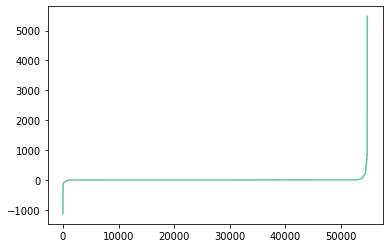

In [62]:
plt.plot(coefs)